<a href="https://colab.research.google.com/github/oliverwsd/finance/blob/master/Set3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [0]:
#Task 1: read returns of test assets and factors

In [2]:
from io import StringIO
import csv


url = 'https://raw.githubusercontent.com/oliverwsd/finance/master/16pf_bm_beta.csv'
pf_16 = pd.read_csv(url)
pf_16.head()

,date,11,12,13,14,21,22,23,24,31,32,33,34,41,42,43,44
0,196207,2.27,-8.57,-2.09,-2.93,0.82,-6.30,-3.96,0.94,-4.21,-3.84,-1.44,-4.38,-1.96,-4.97,-4.00,-13.47
1,196208,-4.76,3.27,2.72,3.80,1.86,-1.15,0.96,-0.30,-3.08,-2.59,1.49,2.26,-0.82,-1.25,1.19,-2.93
2,196209,-3.02,-0.28,-5.11,-6.88,-3.44,-1.62,-4.09,-8.85,-0.65,-4.05,-6.13,-4.74,-5.62,-3.10,3.56,-3.41
3,196210,-3.89,-7.73,-6.27,-4.37,-5.18,-6.99,-3.56,-3.16,-3.06,-5.75,-4.40,-4.98,-2.54,-4.00,1.81,-3.77
4,196211,13.19,13.59,17.68,28.34,16.60,17.28,22.54,22.71,5.39,14.68,17.74,15.60,7.75,11.38,7.63,12.65


In [3]:
pf_16['date'] = pd.to_datetime(pf_16['date'],format='%Y%m')
pf_16.head()

,date,11,12,13,14,21,22,23,24,31,32,33,34,41,42,43,44
0,1962-07-01,2.27,-8.57,-2.09,-2.93,0.82,-6.30,-3.96,0.94,-4.21,-3.84,-1.44,-4.38,-1.96,-4.97,-4.00,-13.47
1,1962-08-01,-4.76,3.27,2.72,3.80,1.86,-1.15,0.96,-0.30,-3.08,-2.59,1.49,2.26,-0.82,-1.25,1.19,-2.93
2,1962-09-01,-3.02,-0.28,-5.11,-6.88,-3.44,-1.62,-4.09,-8.85,-0.65,-4.05,-6.13,-4.74,-5.62,-3.10,3.56,-3.41
3,1962-10-01,-3.89,-7.73,-6.27,-4.37,-5.18,-6.99,-3.56,-3.16,-3.06,-5.75,-4.40,-4.98,-2.54,-4.00,1.81,-3.77
4,1962-11-01,13.19,13.59,17.68,28.34,16.60,17.28,22.54,22.71,5.39,14.68,17.74,15.60,7.75,11.38,7.63,12.65


In [4]:
factors_url = 'https://raw.githubusercontent.com/oliverwsd/finance/master/monthly_factors.csv'
factors = pd.read_csv(factors_url)
factors['date'] = pd.to_datetime(factors['date'],format='%Y%m')
factors.head()

,date,rm,rf,SMB,HML,WML
0,1962-07-01,-5.53,0.25,-0.29,-1.05,2.38
1,1962-08-01,6.11,0.25,-5.50,-1.63,0.80
2,1962-09-01,-6.32,0.26,2.26,0.14,1.94
3,1962-10-01,-2.03,0.24,-3.12,1.13,1.14
4,1962-11-01,19.29,0.24,-0.87,-9.73,-10.36


In [0]:
# Read-in the factors for German market from the provided file 'monthly_factors.csv' (rf is risk free rate):
#   1. rm (Market factor)
#   2. SMB (Fama-French size factor)
#   3. HML (Fama-French value factor)
#   4. WML (Carhart momentum factor)

In [5]:
# Check 
print(pf_16.loc[1,'21'])
print(factors.loc[4,'SMB'])

1.86
-0.87


In [21]:
# Task2: Capital Asset Pricing Model
# Estimate the Capital Asset Pricing Model for the '11' and '44' portfolios
X = pd.DataFrame()
X['const'] = np.ones(len(factors['rm']))
X['rm_excess'] = factors['rm'] - factors['rf']
X.head()

,const,rm_excess
0,1.0,-5.78
1,1.0,5.86
2,1.0,-6.58
3,1.0,-2.27
4,1.0,19.05


In [24]:
# Y: excess return for the 11 PF
Y = pd.DataFrame()
Y['11_excess'] = pf_16['11'] - factors['rf']
Y.head()

,11_excess
0,2.02
1,-5.01
2,-3.28
3,-4.13
4,12.95


In [25]:
# Set up OLS model for 11 PF following the CAPM model: 
# r_{11} - r_f = \alpha + \beta * (r_M - r_f) + error_{11}
model_11 = sm.OLS(Y,X)
results_11 = model_11.fit()
print(results_11.summary())

                            OLS Regression Results                            
Dep. Variable:              11_excess   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     279.1
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           5.90e-52
Time:                        10:13:34   Log-Likelihood:                -1437.7
No. Observations:                 618   AIC:                             2879.
Df Residuals:                     616   BIC:                             2888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.100      0.012      0.9

In [26]:
Y = pd.DataFrame()
Y['44_excess'] = pf_16['44'] - factors['rf']
Y.head()

model_44 = sm.OLS(Y,X)
results_44 = model_44.fit()
print(results_44.summary())

                            OLS Regression Results                            
Dep. Variable:              44_excess   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     800.8
Date:                Fri, 22 Nov 2019   Prob (F-statistic):          1.65e-113
Time:                        10:16:59   Log-Likelihood:                -1746.0
No. Observations:                 618   AIC:                             3496.
Df Residuals:                     616   BIC:                             3505.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1216      0.165      0.737      0.4

In [30]:
# Forecast using the CAPM
# expected market risk preimum MRP of 6%
# riskfree rate of 2 %
# alpha = 0
# Exp Ret = beta * Exp MRP 
# calculate expected return for PF 11 & 44
# Beta estimated from above OLS
EXP_MARKET_EXCESS_RETURN = 6
RISKFREE = 2
exp_ret_11 = results_11.params[1]* EXP_MARKET_EXCESS_RETURN
exp_ret_44 = results_44.params[1]* EXP_MARKET_EXCESS_RETURN
exp_ret_44
# 7.48 ?

5.480192897399658

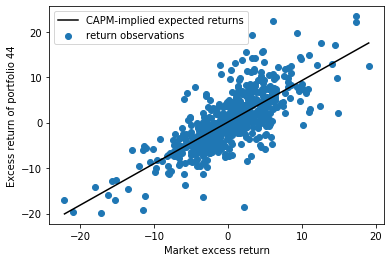

In [32]:
plt.scatter(X['rm_excess'], Y['44_excess'], label = 'return observations')
x = np.linspace(X['rm_excess'].min(), X['rm_excess'].max(), 30)
y = results_44.params[0] + results_44.params[1] * x
plt.plot(x, y, label = 'CAPM-implied expected returns', color = 'black')
plt.legend()
plt.xlabel("Market excess return")
plt.ylabel("Excess return of portfolio 44")
plt.show()

In [36]:
# Task 3: estimation of the security market line
portfolios = ['11', '12', '13', '14', '21', '22', '23', '24', '31', '32', '33', '34', '41', '42', '43', '44']
betas = pd.DataFrame(index = portfolios, columns = ['beta'], dtype = np.float64)
for x in portfolios: 
  Y = pd.DataFrame()
  Y['44_excess'] = pf_16['x'] - factors['rf']
  model_44 = sm.OLS(Y,X).fit()
  model_44

11
12
13
14
21
22
23
24
31
32
33
34
41
42
43
44
